In [20]:
%load_ext autoreload
%autoreload 2
# Test Data 10.npz
from pr3_utils import *

# Load the measurements
filename = "./data/10.npz"
t, features, linear_velocity, angular_velocity, K, b, imu_T_cam = load_data(filename)
print(features.shape, linear_velocity.shape)
print(K, b, imu_T_cam)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(4, 13289, 3026) (3, 3026)
[[552.554261   0.       682.049453]
 [  0.       552.554261 238.769549]
 [  0.         0.         1.      ]] 0.6 [[ 0.03717833 -0.09861822  0.9944306   1.5752681 ]
 [ 0.99926755 -0.00535534 -0.03789026  0.00439141]
 [ 0.00906218  0.99511094  0.09834688 -0.65      ]
 [ 0.          0.          0.          1.        ]]


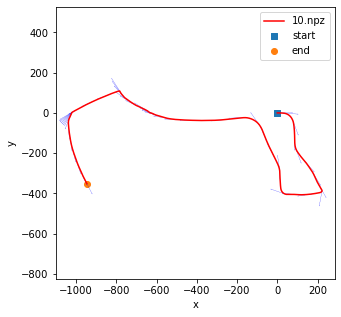

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [21]:
# Simple Prediction Test Dead Reckoning
from Robot import Robot
robot = Robot(t[0][0], 1, imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_t = t[0][i]
    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
visualize_trajectory_2d(states, None, "10.npz", True)

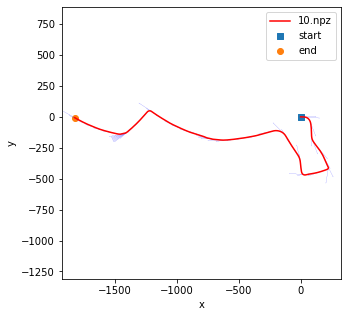

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [22]:
# Simple Prediction Test Dead Reckoning + Ground Constraint
from Robot import Robot
robot = Robot(t[0][0], 1, imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_t = t[0][i]
    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
visualize_trajectory_2d(states, None, "10.npz", True)

(4, 3322, 3026)


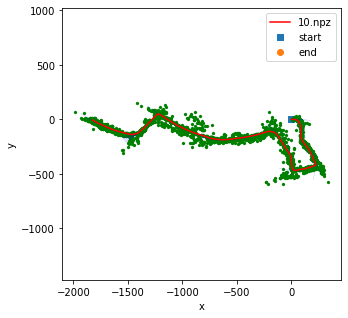

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [23]:
# EKF Predict + Mapping
from Robot import Robot
n_feat = features.shape[1]
feat = features[:, 1:n_feat:4, :]
print(feat.shape)
robot = Robot(t[0][0], feat.shape[1], imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_t = t[0][i]
    cur_feat = feat[:, :, i]

    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    robot.UpdateMapOnly(cur_feat)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
landmarks = robot.landmarks_
visualize_trajectory_2d(states, landmarks, "10.npz", True)

(4, 1661, 3026)


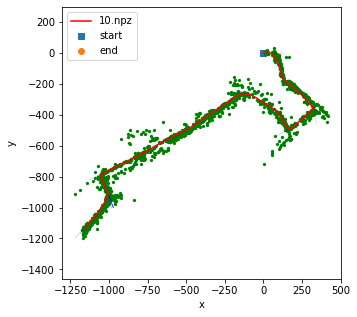

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [26]:
# EKF VIO
from Robot import Robot
n_feat = features.shape[1]
feat = features[:, 1:n_feat:8, :]
print(feat.shape)
robot = Robot(t[0][0], feat.shape[1], imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_t = t[0][i]
    cur_feat = feat[:, :, i]

    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    robot.EKFUpdate(cur_feat)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
landmarks = robot.landmarks_
visualize_trajectory_2d(states, landmarks, "10.npz", True)

In [14]:
%load_ext autoreload
%autoreload 2
# Test Data 03.npz
from pr3_utils import *

# Load the measurements
filename = "./data/03.npz"
t, features, linear_velocity, angular_velocity, K, b, imu_T_cam = load_data(filename)
print(features.shape, linear_velocity.shape)
print(K, b, imu_T_cam)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(4, 5105, 1010) (3, 1010)
[[552.554261   0.       682.049453]
 [  0.       552.554261 238.769549]
 [  0.         0.         1.      ]] 0.6 [[ 0.03717833 -0.09861822  0.9944306   1.5752681 ]
 [ 0.99926755 -0.00535534 -0.03789026  0.00439141]
 [ 0.00906218  0.99511094  0.09834688 -0.65      ]
 [ 0.          0.          0.          1.        ]]


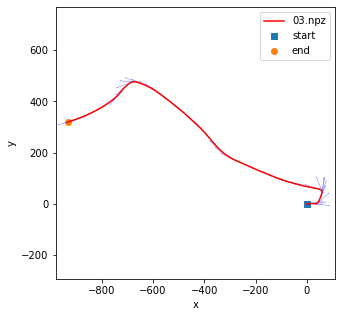

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [15]:
# Simple Prediction Test Dead Reckoning
from Robot import Robot
robot = Robot(t[0][0], 1, imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_t = t[0][i]
    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
visualize_trajectory_2d(states, None, "03.npz", True)

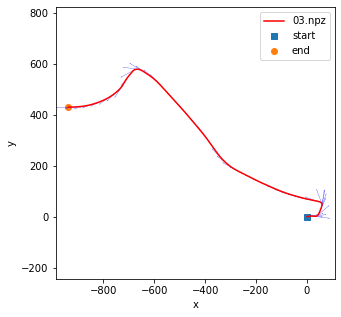

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [16]:
# Simple Prediction Test Dead Reckoning + Ground Constraint
from Robot import Robot
robot = Robot(t[0][0], 1, imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_t = t[0][i]
    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
visualize_trajectory_2d(states, None, "03.npz", True)

(4, 1276, 1010)


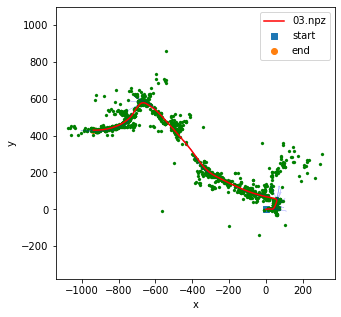

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [17]:
# EKF Predict + Mapping
from Robot import Robot
n_feat = features.shape[1]
feat = features[:, 1:n_feat:4, :]
print(feat.shape)
robot = Robot(t[0][0], feat.shape[1], imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_t = t[0][i]
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_feat = feat[:, :, i]

    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    robot.UpdateMapOnly(cur_feat)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
landmarks = robot.landmarks_
visualize_trajectory_2d(states, landmarks, "03.npz", True)

(4, 1276, 1010)


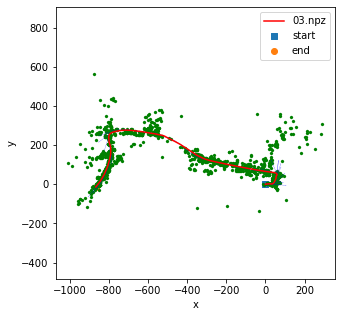

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [18]:
# EKF VIO
from Robot import Robot
n_feat = features.shape[1]
feat = features[:, 1:n_feat:4, :]
print(feat.shape)
robot = Robot(t[0][0], feat.shape[1], imu_T_cam, b, K)

states = []
states.append(robot.state_)
for i in range(1, t.shape[1]):
    cur_v = linear_velocity[:, i].reshape(-1, 1)
    cur_w = angular_velocity[:, i].reshape(-1, 1)
    cur_t = t[0][i]
    cur_v[2, :] = 0.0
    cur_w[:2, :] = 0.0
    cur_feat = feat[:, :, i]

    robot.EKFPredict(np.vstack([cur_v, cur_w]), cur_t)
    robot.EKFUpdate(cur_feat)
    states.append(robot.state_)

n = len(states)
states = np.array(states)
landmarks = robot.landmarks_
visualize_trajectory_2d(states, landmarks, "03.npz", True)